# Gráficos

In [2]:
#importo librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuraciones recomendadas para mejor visualización en notebooks
%matplotlib inline
#%matplotlib tk
plt.style.use('seaborn-v0_8-whitegrid') # Un estilo agradable para Matplotlib
sns.set_theme(style="whitegrid", palette="pastel") # Un tema agradable para Seaborn

## Gráfico de líneas

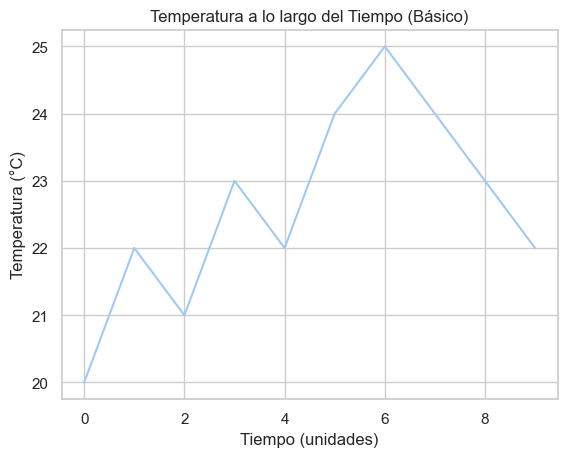

In [3]:
# --- Datos ---
# Supongamos una secuencia de mediciones a lo largo del tiempo
tiempo = np.arange(0, 10, 1) # Puntos de tiempo de 0 a 9
mediciones_temperatura = np.array([20, 22, 21, 23, 22, 24, 25, 24, 23, 22]) # Mediciones
 
# --- Creación del Gráfico ---
fig, ax = plt.subplots() # Crea una figura y un conjunto de ejes (subplot)
 
# Dibuja el gráfico de líneas
ax.plot(tiempo, mediciones_temperatura)
 
# --- Personalización Básica ---
ax.set_title('Temperatura a lo largo del Tiempo (Básico)') # Título del gráfico
ax.set_xlabel('Tiempo (unidades)') # Etiqueta del eje X
ax.set_ylabel('Temperatura (°C)') # Etiqueta del eje Y
 
plt.show() # Muestra el gráfico

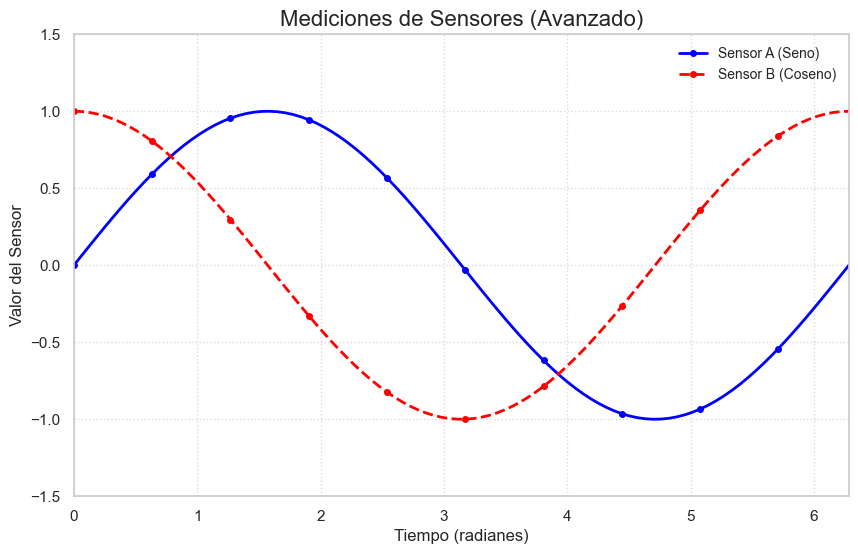

In [4]:
# --- Datos ---
# Múltiples series de datos (ej. mediciones de dos sensores)
tiempo_avanzado = np.linspace(0, 2 * np.pi, 100) # Puntos de tiempo más detallados
# Array 2D donde cada fila es una serie de mediciones
mediciones_sensores = np.array([
    np.sin(tiempo_avanzado),         # Sensor A (onda seno)
    np.cos(tiempo_avanzado)          # Sensor B (onda coseno)
])
nombres_sensores = ['Sensor A (Seno)', 'Sensor B (Coseno)']
colores_sensores = ['blue', 'red']
estilos_linea = ['-', '--']
 
# --- Creación del Gráfico ---
fig, ax = plt.subplots(figsize=(10, 6)) # Ajusta el tamaño de la figura
 
# Dibuja cada serie de mediciones con personalización
for i in range(mediciones_sensores.shape[0]): # Itera sobre cada fila (sensor)
    ax.plot(tiempo_avanzado, mediciones_sensores[i, :],
            label=nombres_sensores[i],      # Etiqueta para la leyenda
            color=colores_sensores[i],      # Color de la línea
            linestyle=estilos_linea[i],     # Estilo de la línea
            linewidth=2,                    # Grosor de la línea
            marker='o',                     # Marcador en cada punto
            markersize=4,                   # Tamaño del marcador
            markevery=10)                   # Muestra marcador cada 10 puntos
 
# --- Personalización Avanzada ---
ax.set_title('Mediciones de Sensores (Avanzado)', fontsize=16)
ax.set_xlabel('Tiempo (radianes)', fontsize=12)
ax.set_ylabel('Valor del Sensor', fontsize=12)
ax.legend(loc='upper right', fontsize=10) # Posición y tamaño de la leyenda
ax.grid(True, linestyle=':', alpha=0.7) # Añade una cuadrícula con estilo
ax.set_xlim(0, 2 * np.pi) # Define los límites del eje X
ax.set_ylim(-1.5, 1.5)    # Define los límites del eje Y
 
plt.show()

## Grafícos de líneas con Seaborn

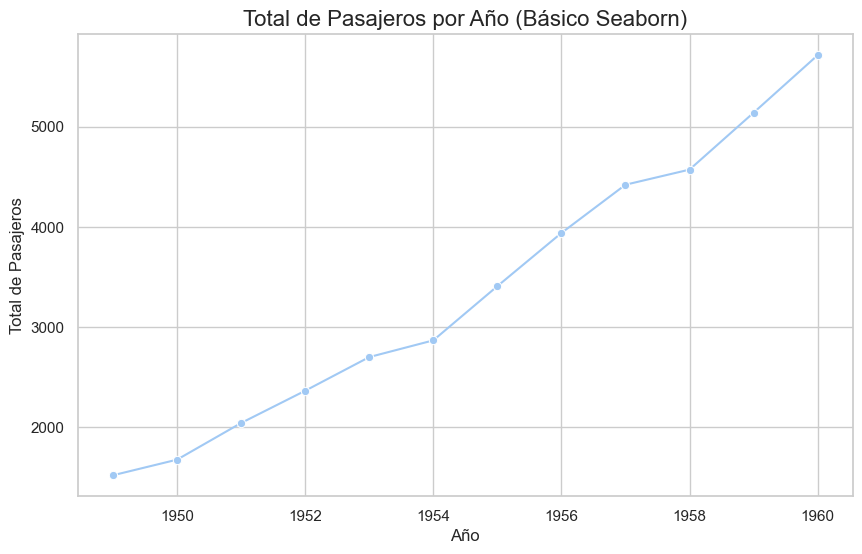

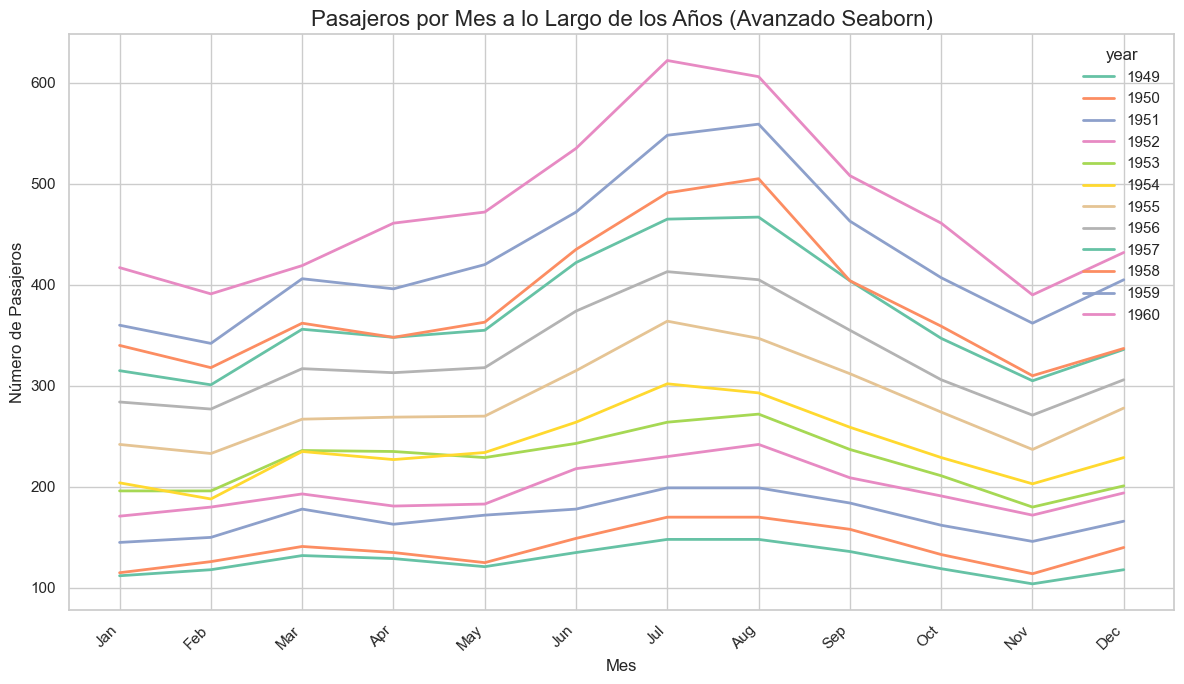

In [5]:
# --- Datos (usaremos el dataset 'flights' incorporado en Seaborn) ---
# Este dataset podría similar a uno que obtendrías de Kaggle sobre vuelos.
# Para usar un CSV de Kaggle, harías:
# df_vuelos = pd.read_csv('tu_archivo_de_vuelos.csv', parse_dates=['columna_fecha'])
df_vuelos = sns.load_dataset('flights')
# 'flights' tiene columnas: year, month, passengers
 
# --- Creación del Gráfico (Básico con una línea, ej. total de pasajeros por año) ---
# Primero, necesitamos agregar los pasajeros por año
pasajeros_por_año = df_vuelos.groupby('year')['passengers'].sum().reset_index()
 
fig, ax = plt.subplots(figsize=(10, 6)) # Ajusta el tamaño de la figura
sns.lineplot(data=pasajeros_por_año, x='year', y='passengers', ax=ax, marker='o') # Dibuja la línea con marcadores en cada punto
ax.set_title('Total de Pasajeros por Año (Básico Seaborn)', fontsize=16)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Total de Pasajeros', fontsize=12)
plt.show()
 
# --- Gráfico Avanzado (múltiples líneas usando 'hue') ---
# Visualizar pasajeros por mes, con una línea por año
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(data=df_vuelos,
             x='month',        # Meses en el eje X
             y='passengers',   # Pasajeros en el eje Y
             hue='year',       # Una línea diferente para cada año (categoría 'hue')
             palette='Set2',# Paleta de colores para los años
             legend='full',    # Mostrar leyenda completa
             linewidth=2,
             ax=ax)
 
ax.set_title('Pasajeros por Mes a lo Largo de los Años (Avanzado Seaborn)', fontsize=16)
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Número de Pasajeros', fontsize=12)
# Rotar etiquetas del eje X si es necesario
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Ajusta el layout para evitar solapamientos
plt.show()

## Gráfico de Disperción

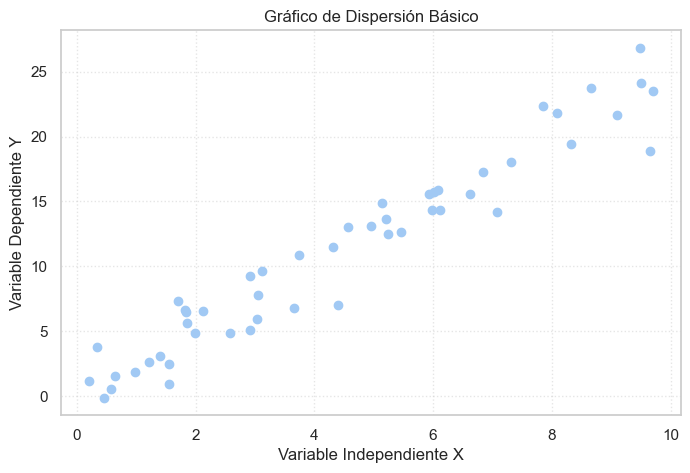

In [6]:
# --- Datos de Ejemplo (Arrays 1D de NumPy) ---
np.random.seed(42) # Para reproducibilidad
coordenadas_x = np.random.rand(50) * 10 # 50 valores aleatorios entre 0 y 10
coordenadas_y = 2.5 * coordenadas_x + np.random.randn(50) * 2 # y = 2.5x + ruido
 
# --- Creación del Gráfico ---
plt.figure(figsize=(8, 5))
plt.scatter(coordenadas_x, coordenadas_y) # Función básica para dispersión
 
# --- Personalización ---
plt.title("Gráfico de Dispersión Básico")
plt.xlabel("Variable Independiente X")
plt.ylabel("Variable Dependiente Y")
plt.grid(True, linestyle=':', alpha=0.5)
 
# --- Mostrar Gráfico ---
plt.show()

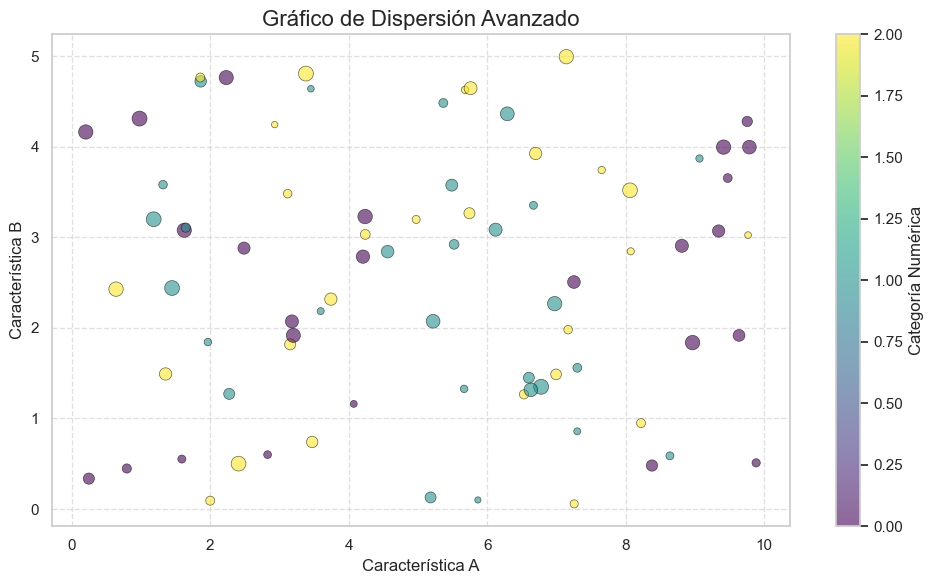

In [7]:
# --- Datos de Ejemplo (Array 2D de NumPy) ---
# Columnas: [Caracteristica_A, Caracteristica_B, Categoria_Numerica, Tamaño_Punto]
np.random.seed(0)
datos_2d_dispersion = np.random.rand(80, 4) # 80 observaciones, 4 características
datos_2d_dispersion[:, 0] *= 10 # Escala Caracteristica_A
datos_2d_dispersion[:, 1] *= 5  # Escala Caracteristica_B
datos_2d_dispersion[:, 2] = np.random.randint(0, 3, 80) # Categoria (0, 1, 2)
datos_2d_dispersion[:, 3] = (datos_2d_dispersion[:, 3] * 100) + 20 # Tamaño de puntos
 
# Extraer columnas para el gráfico
x_avanzado = datos_2d_dispersion[:, 0]
y_avanzado = datos_2d_dispersion[:, 1]
colores_puntos = datos_2d_dispersion[:, 2] # Usar para mapear a colores
tamaños_puntos = datos_2d_dispersion[:, 3] # Usar para el tamaño de los puntos
 
# --- Creación del Gráfico con API Orientada a Objetos ---
fig, ax = plt.subplots(figsize=(10, 6))
 
# --- Graficar ---
# 'c' para el color, 's' para el tamaño, 'cmap' para el mapa de colores si 'c' es numérico
scatter_plot = ax.scatter(x_avanzado, y_avanzado,
                          c=colores_puntos,    # Mapea la tercera columna a colores
                          s=tamaños_puntos,    # Mapea la cuarta columna a tamaños
                          alpha=0.6,           # Transparencia
                          cmap='viridis',      # Mapa de colores para 'c'
                          edgecolors='black',  # Color del borde de los puntos
                          linewidth=0.5)
 
# --- Personalización Avanzada ---
ax.set_title("Gráfico de Dispersión Avanzado", fontsize=16)
ax.set_xlabel("Característica A", fontsize=12)
ax.set_ylabel("Característica B", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
 
# Añadir una barra de color para la variable 'colores_puntos'
barra_color = fig.colorbar(scatter_plot, label='Categoría Numérica')
 
# (Opcional) Añadir leyenda si los colores representan categorías discretas con etiquetas
# Esto requiere graficar cada categoría por separado o usar manejadores de leyenda.
# Por simplicidad, la barra de color es más directa para 'c' numérico.
 
# --- Mostrar Gráfico ---
plt.tight_layout()
plt.show()
 

## Seaborn - Gráfico con DataFrame

Primeras filas del DataFrame 'tips':
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


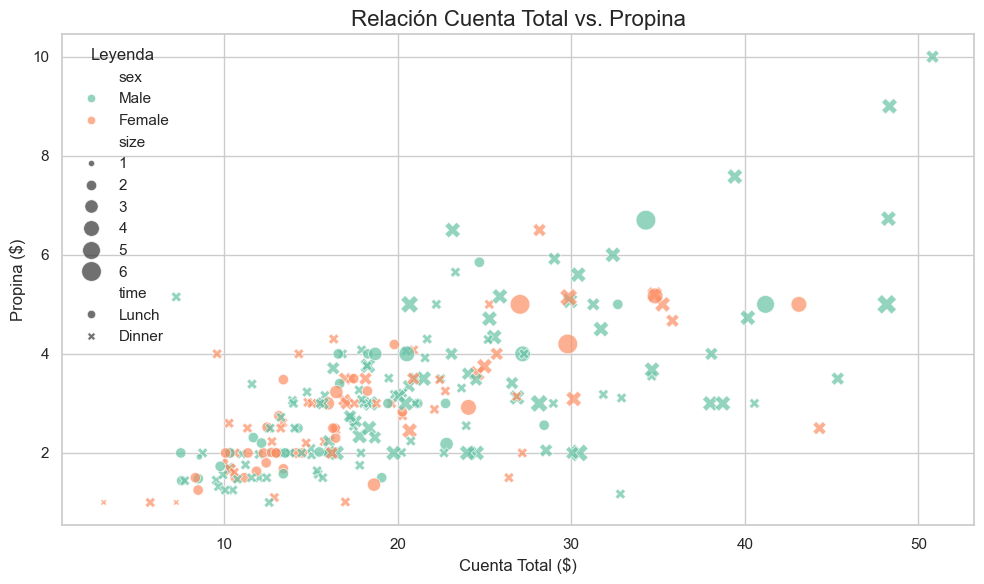

In [8]:
# --- Carga de Datos de Ejemplo (DataFrame de Pandas) ---
df_propinas = sns.load_dataset("tips")
 
# Visualizamos las primeras filas
print("Primeras filas del DataFrame 'tips':")
print(df_propinas.head())
 
# --- Creación del Gráfico de Dispersión con Seaborn ---
plt.figure(figsize=(10, 6))
dispersion_propinas = sns.scatterplot(
    data=df_propinas,
    x="total_bill",      # Columna para el eje X
    y="tip",             # Columna para el eje Y
    hue="sex",           # Diferencia por color según la columna 'sex'
    size="size",         # Diferencia por tamaño del punto según la columna 'size' (nº personas)
    style="time",        # Diferencia por estilo del marcador según la columna 'time'
    palette="Set2",      # Paleta de colores para 'hue'
    sizes=(20, 200),     # Rango de tamaños para 'size'
    alpha=0.7            # Transparencia
)
 
# --- Personalización ---
dispersion_propinas.set_title("Relación Cuenta Total vs. Propina", fontsize=16)
dispersion_propinas.set_xlabel("Cuenta Total ($)", fontsize=12)
dispersion_propinas.set_ylabel("Propina ($)", fontsize=12)
dispersion_propinas.legend(title="Leyenda") # Título para la leyenda combinada
 
# --- Mostrar Gráfico ---
plt.tight_layout()
plt.show()
 

## Gráfico de barras

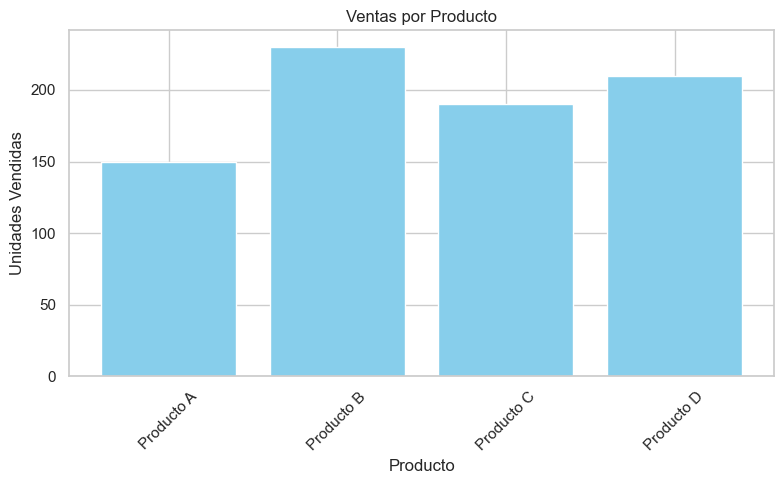

In [9]:
# --- Datos de Ejemplo (Array 1D de NumPy para valores, lista para categorías) ---
categorias = ['Producto A', 'Producto B', 'Producto C', 'Producto D']
ventas = np.array([150, 230, 190, 210]) # Ventas por producto
 
# --- Creación del Gráfico ---
plt.figure(figsize=(8, 5))
plt.bar(categorias, ventas, color='skyblue') # Función básica para barras verticales
 
# --- Personalización ---
plt.title("Ventas por Producto")
plt.xlabel("Producto")
plt.ylabel("Unidades Vendidas")
plt.xticks(rotation=45) # Rota las etiquetas del eje X para mejor lectura si son largas
 
# --- Mostrar Gráfico ---
plt.tight_layout()
plt.show()
 

## Gráfico avanzado con matplotlib

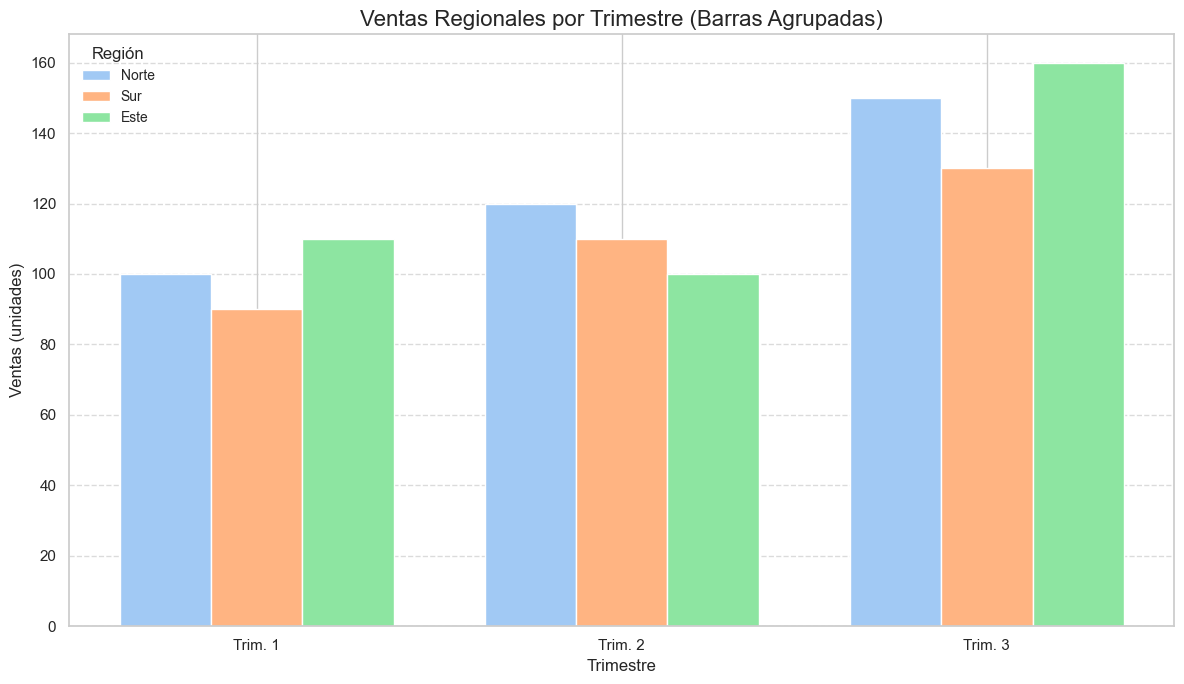

In [10]:
# --- Datos de Ejemplo (Array 2D de NumPy) ---
# Filas: Regiones (Norte, Sur, Este)
# Columnas: Ventas por Trimestre (T1, T2, T3)
ventas_regionales_2d = np.array([
    [100, 120, 150], # Región Norte: T1, T2, T3
    [90, 110, 130],  # Región Sur: T1, T2, T3
    [110, 100, 160]  # Región Este: T1, T2, T3
])
 
n_regiones = ventas_regionales_2d.shape[0]
n_trimestres = ventas_regionales_2d.shape[1]
 
etiquetas_regiones = ['Norte', 'Sur', 'Este']
etiquetas_trimestres = ['Trim. 1', 'Trim. 2', 'Trim. 3']
 
# --- Creación del Gráfico con API Orientada a Objetos ---
fig, ax = plt.subplots(figsize=(12, 7))
 
ancho_barra = 0.25 # Ancho de cada barra individual
indices = np.arange(n_trimestres) # Posiciones para los grupos de barras (0, 1, 2)
 
# --- Graficar barras para cada región ---
for i in range(n_regiones):
    posiciones_barras = indices + (i - (n_regiones - 1) / 2) * ancho_barra # Calcula la posición x de cada barra en un grupo
    ax.bar(posiciones_barras, ventas_regionales_2d[i, :],
           width=ancho_barra,
           label=etiquetas_regiones[i])
 
# --- Personalización Avanzada ---
ax.set_title("Ventas Regionales por Trimestre (Barras Agrupadas)", fontsize=16)
ax.set_xlabel("Trimestre", fontsize=12)
ax.set_ylabel("Ventas (unidades)", fontsize=12)
ax.set_xticks(indices) # Posiciona las etiquetas de los trimestres en el centro de los grupos
ax.set_xticklabels(etiquetas_trimestres)
ax.legend(title="Región", fontsize=10)
ax.grid(True, axis='y', linestyle='--', alpha=0.7) # Cuadrícula solo en el eje Y
 
# --- Mostrar Gráfico ---
plt.tight_layout()
plt.show()

## Seaborn - Gráfico con Dataframe

Primeras filas del DataFrame 'titanic':
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


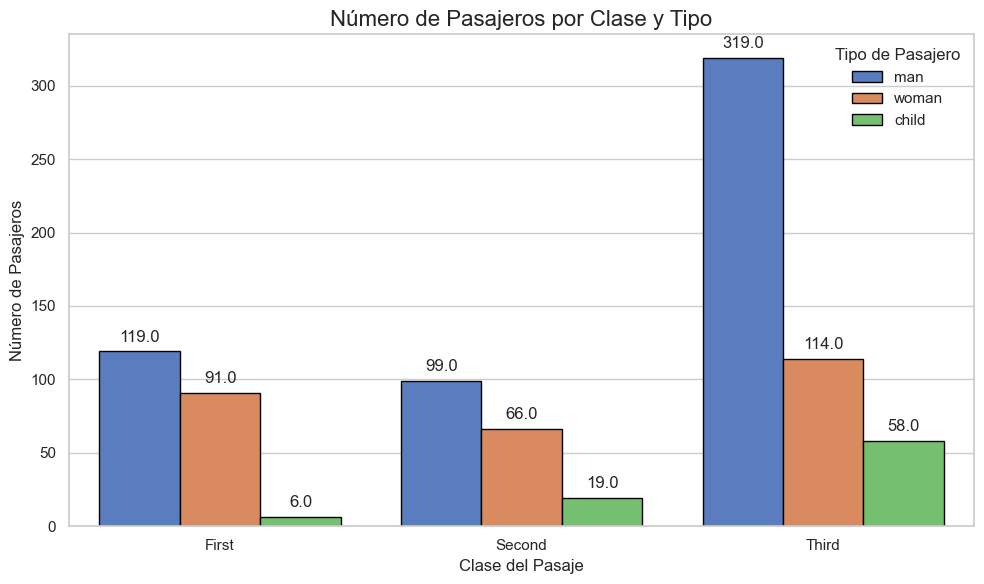

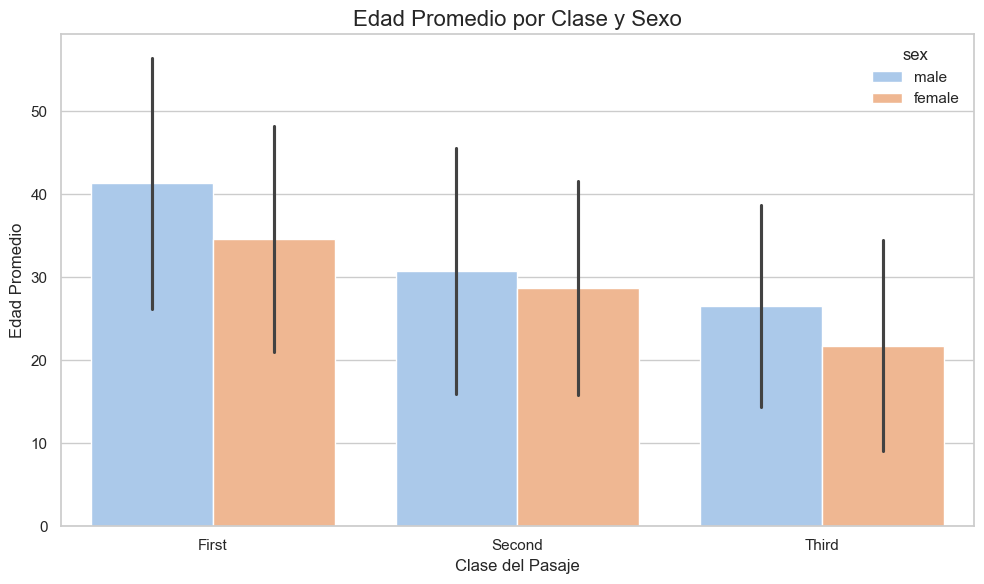

In [13]:
# --- Carga de Datos de Ejemplo (DataFrame de Pandas) ---
df_titanic = sns.load_dataset("titanic")
 
# Visualizamos las primeras filas
print("Primeras filas del DataFrame 'titanic':")
print(df_titanic.head())
 
# --- Creación del Gráfico de Barras (Conteo) con Seaborn ---
plt.figure(figsize=(10, 6))
countplot_clase = sns.countplot(
    data=df_titanic,
    x="class",           # Columna categórica para contar
    hue="who",           # Subdivide las barras por otra categoría (hombre, mujer, niño)
    palette="muted",     # Paleta de colores
    order=['First', 'Second', 'Third'], # Orden específico para las categorías en el eje X
    edgecolor='black'    # Color del borde de las barras
)
 
# --- Personalización ---
countplot_clase.set_title("Número de Pasajeros por Clase y Tipo", fontsize=16)
countplot_clase.set_xlabel("Clase del Pasaje", fontsize=12)
countplot_clase.set_ylabel("Número de Pasajeros", fontsize=12)
countplot_clase.legend(title="Tipo de Pasajero")
 
# Añadir anotaciones con el conteo en cada barra (opcional, un poco más avanzado)
for p in countplot_clase.patches:

    height = p.get_height()

    if height > 0:

        countplot_clase.annotate(

            f'{height}',

            (p.get_x() + p.get_width() / 2., height),

            ha='center', va='bottom',

            xytext=(0, 5),

            textcoords='offset points'

        )

# --- Mostrar Gráfico ---
plt.tight_layout()
plt.show()
 
# --- Alternativa: Gráfico de Barras con Estimación (Media) ---
plt.figure(figsize=(10, 6))
barplot_edad_clase = sns.barplot(
    data=df_titanic,
    x="class",
    y="age",
    hue="sex",
    palette="pastel",
    estimator=np.mean, # Puede ser np.median, np.sum, etc.
    errorbar="sd" # Muestra la desviación estándar como barra de error ('ci' para intervalo de confianza)
)
barplot_edad_clase.set_title("Edad Promedio por Clase y Sexo", fontsize=16)
barplot_edad_clase.set_xlabel("Clase del Pasaje", fontsize=12)
barplot_edad_clase.set_ylabel("Edad Promedio", fontsize=12)
plt.tight_layout()
plt.show()

## Histograma con Matplotlib

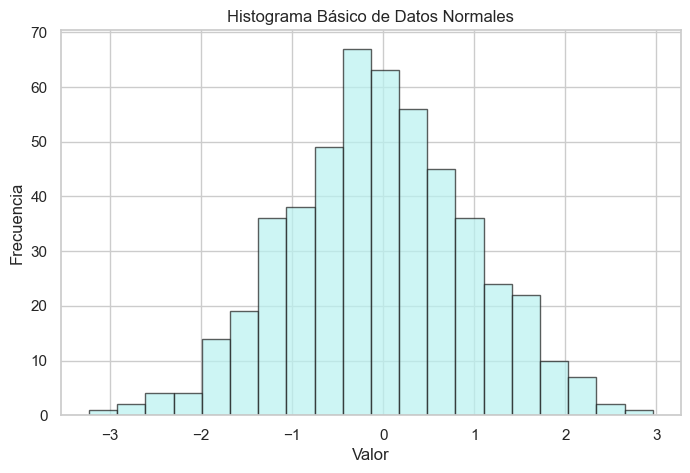

In [15]:
# --- Datos de Ejemplo (Array 1D de NumPy) ---
np.random.seed(123)
datos_normales = np.random.randn(500) # 500 muestras de una distribución normal estándar
 
# --- Creación del Gráfico ---
plt.figure(figsize=(8, 5))
plt.hist(datos_normales, bins=20, color='c', edgecolor='k', alpha=0.7) # bins define el número de contenedores
 
# --- Personalización ---
plt.title("Histograma Básico de Datos Normales")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
 
# --- Mostrar Gráfico ---
plt.show()

## Histograma superpuesto con Matplotlib

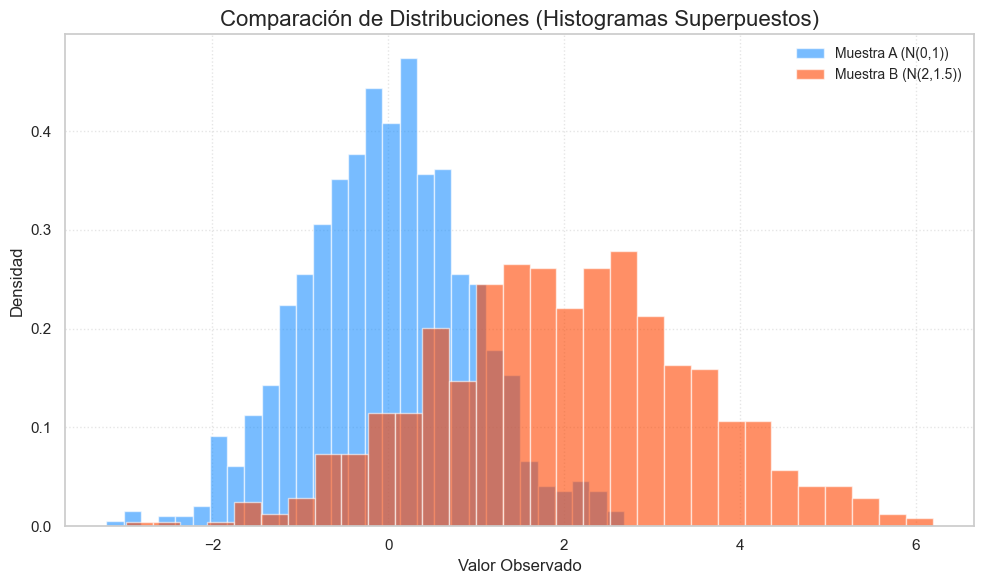

In [16]:
# --- Datos de Ejemplo (Array 2D de NumPy) ---
# Columnas: [Muestra_A, Muestra_B]
np.random.seed(10)
muestra_A = np.random.normal(loc=0, scale=1, size=1000)
muestra_B = np.random.normal(loc=2, scale=1.5, size=800)
 
# --- Creación del Gráfico con API Orientada a Objetos ---
fig, ax = plt.subplots(figsize=(10, 6))
 
# --- Graficar histogramas superpuestos ---
ax.hist(muestra_A, bins=30, alpha=0.6, label='Muestra A (N(0,1))', color='dodgerblue', density=True)
ax.hist(muestra_B, bins=30, alpha=0.6, label='Muestra B (N(2,1.5))', color='orangered', density=True)
# density=True normaliza el histograma para que el área total sea 1 (útil para comparar formas)
 
# --- Personalización Avanzada ---
ax.set_title("Comparación de Distribuciones (Histogramas Superpuestos)", fontsize=16)
ax.set_xlabel("Valor Observado", fontsize=12)
ax.set_ylabel("Densidad", fontsize=12) # "Frecuencia" si density=False
ax.legend(fontsize=10)
ax.grid(True, linestyle=':', alpha=0.5)
 
# --- Mostrar Gráfico ---
plt.tight_layout()
plt.show()

## Histograma Seaborn - Gráfico con Dataframe

Primeras filas del DataFrame 'iris':
     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
105           7.6          3.0           6.6          2.1  virginica
106           4.9          2.5           4.5          1.7  virginica
107           7.3          2.9           6.3          1.8  virginica
108           6.7          2.5           5.8          1.8  virginica
109           7.2          3.6           6.1          2.5  virginica

[110 rows x 5 columns]


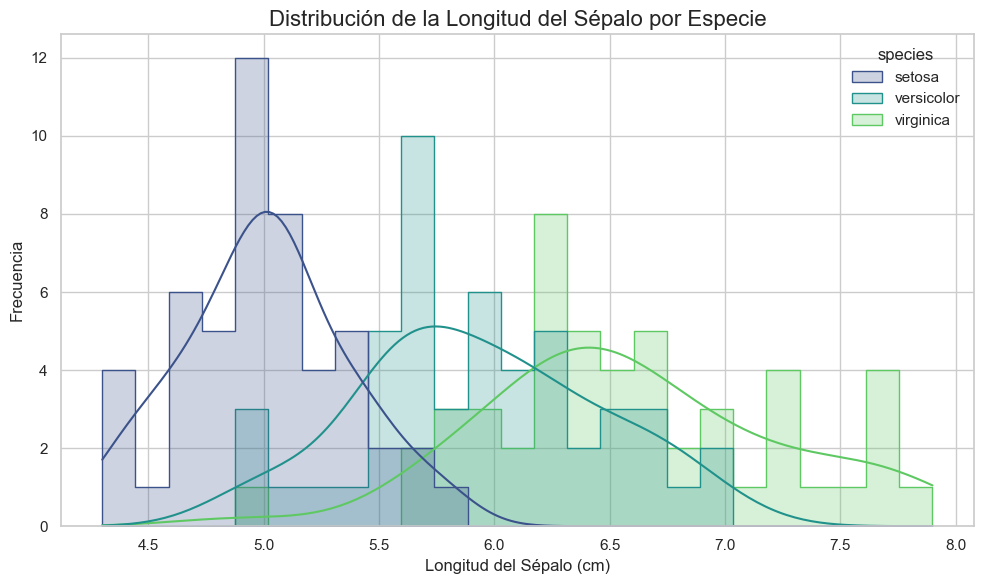

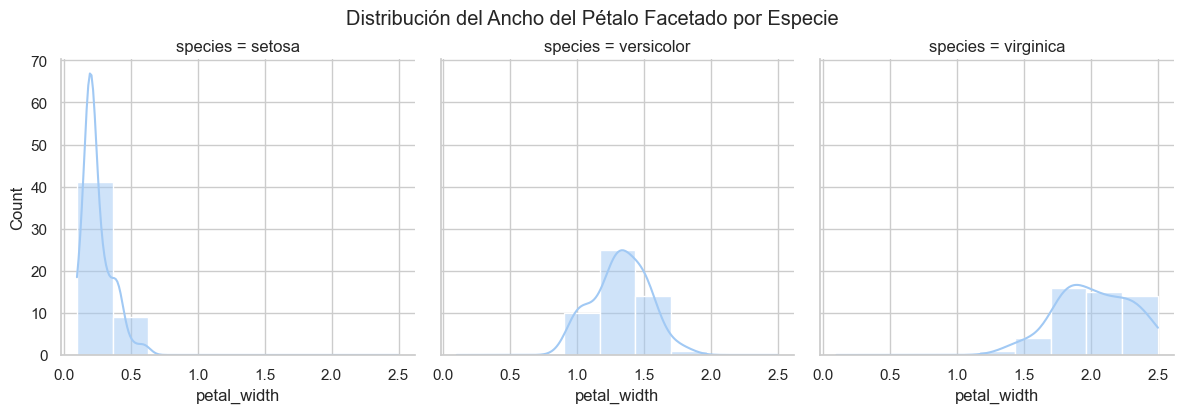

In [17]:
# --- Carga de Datos de Ejemplo (DataFrame de Pandas) ---
df_iris = sns.load_dataset("iris")
 
# Visualizamos las primeras filas
print("Primeras filas del DataFrame 'iris':")
print(df_iris.head(110))
 
# --- Creación del Histograma con Seaborn ---
plt.figure(figsize=(10, 6))
hist_iris = sns.histplot(
    data=df_iris,
    x="sepal_length",    # Columna para el histograma
    hue="species",       # Crea histogramas separados por color para cada especie
    kde=True,            # Añade una curva KDE superpuesta para cada histograma
    bins=25,             # Número de contenedores (o puede ser una lista de bordes)
    palette="viridis",   # Paleta de colores para 'hue' (magma, coolwarm, etc.)
    element="step",      # Estilo de las barras (step, bars, polygon)
    # element="bars", stat="frequency" # para barras apiladas con frecuencia
)
 
# --- Personalización ---
hist_iris.set_title("Distribución de la Longitud del Sépalo por Especie", fontsize=16)
hist_iris.set_xlabel("Longitud del Sépalo (cm)", fontsize=12)
hist_iris.set_ylabel("Densidad" if hist_iris.get_ylabel() == "Density" else "Frecuencia", fontsize=12) # Ajusta etiqueta Y
 
# --- Mostrar Gráfico ---
plt.tight_layout()
plt.show()
 
# --- Alternativa: displot para facetado ---
g = sns.displot(data=df_iris, x="petal_width", col="species", kind="hist", kde=True, height=4, aspect=1)
g.fig.suptitle("Distribución del Ancho del Pétalo Facetado por Especie", y=1.03)
plt.show()

## Matplotlib Mapa de Calor

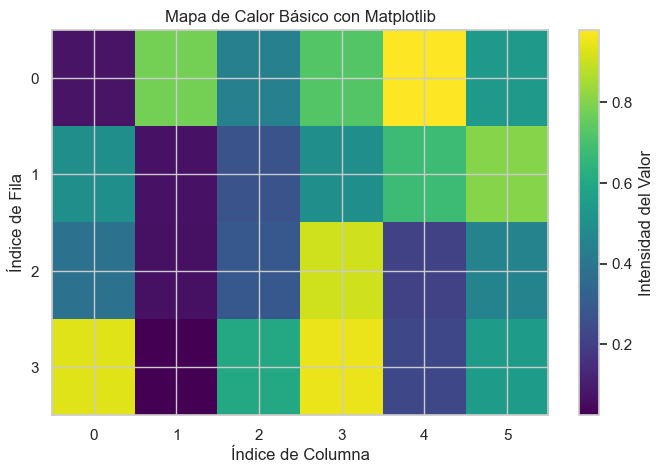

In [18]:
# --- Datos de Ejemplo (Array 2D de NumPy) ---
np.random.seed(7)
datos_heatmap_basico = np.random.rand(4, 6) # Matriz 4x6 con valores entre 0 y 1
 
# --- Creación del Gráfico ---
plt.figure(figsize=(8, 5))
plt.imshow(datos_heatmap_basico, cmap='viridis', aspect='auto')
# cmap: mapa de colores a utilizar
# aspect='auto': ajusta el aspecto para llenar la figura, puede ser 'equal'
 
# --- Personalización ---
plt.colorbar(label='Intensidad del Valor') # Añade la barra de color
plt.title("Mapa de Calor Básico con Matplotlib")
plt.xlabel("Índice de Columna")
plt.ylabel("Índice de Fila")
 
# Poner ticks en el centro de las celdas (opcional)
plt.xticks(np.arange(datos_heatmap_basico.shape[1]))
plt.yticks(np.arange(datos_heatmap_basico.shape[0]))
 
# --- Mostrar Gráfico ---
plt.show()

## Matplotlib Gráfico Avazado

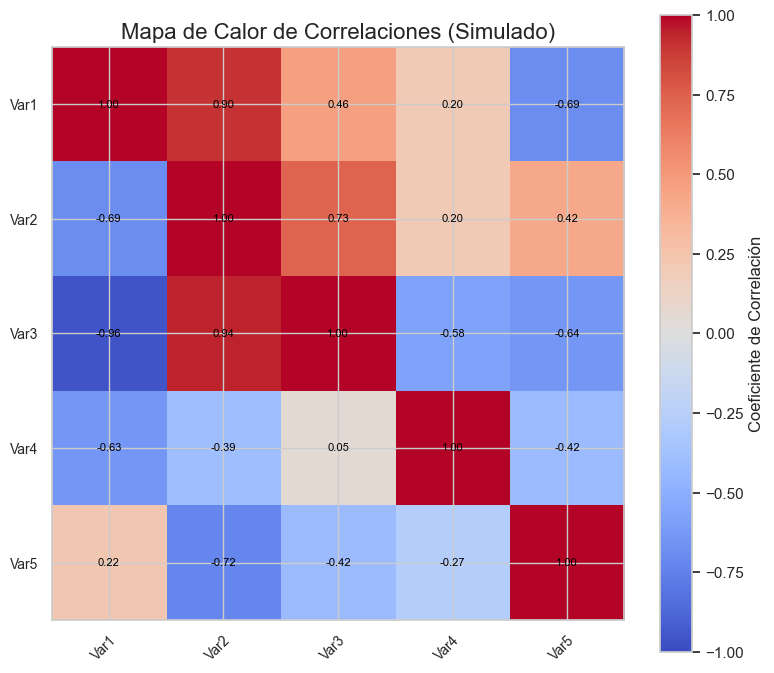

In [19]:
# --- Datos de Ejemplo (Array 2D de NumPy) ---
np.random.seed(42)
datos_correlacion = np.random.rand(5, 5) * 2 - 1 # Matriz 5x5, valores entre -1 y 1 (simulando correlaciones)
np.fill_diagonal(datos_correlacion, 1) # Las correlaciones de una variable consigo misma son 1
 
etiquetas_variables = [f'Var{i+1}' for i in range(datos_correlacion.shape[0])]
 
# --- Creación del Gráfico con API Orientada a Objetos ---
fig, ax = plt.subplots(figsize=(8, 7))
 
# --- Graficar el mapa de calor ---
imagen_heatmap = ax.imshow(datos_correlacion, cmap='coolwarm', vmin=-1, vmax=1)
# vmin y vmax fijan los límites de la escala de color, útil para correlaciones
 
# --- Personalización Avanzada ---
ax.set_title("Mapa de Calor de Correlaciones (Simulado)", fontsize=16)
 
# Configurar ticks y etiquetas de los ejes
ax.set_xticks(np.arange(len(etiquetas_variables)))
ax.set_yticks(np.arange(len(etiquetas_variables)))
ax.set_xticklabels(etiquetas_variables, fontsize=10)
ax.set_yticklabels(etiquetas_variables, fontsize=10)
 
# Rotar las etiquetas del eje X si es necesario
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
 
# Añadir los valores numéricos dentro de cada celda
for i in range(len(etiquetas_variables)):
    for j in range(len(etiquetas_variables)):
        texto_celda = ax.text(j, i, f"{datos_correlacion[i, j]:.2f}", # Formato a 2 decimales
                              ha="center", va="center", color="black", fontsize=8)
 
# Añadir la barra de color
cbar = fig.colorbar(imagen_heatmap, ax=ax, label='Coeficiente de Correlación')
 
# --- Mostrar Gráfico ---
plt.tight_layout()
plt.show()

## Seaborn Gráfico con Dataframe

DataFrame pivotado 'flights_pivot':
year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472


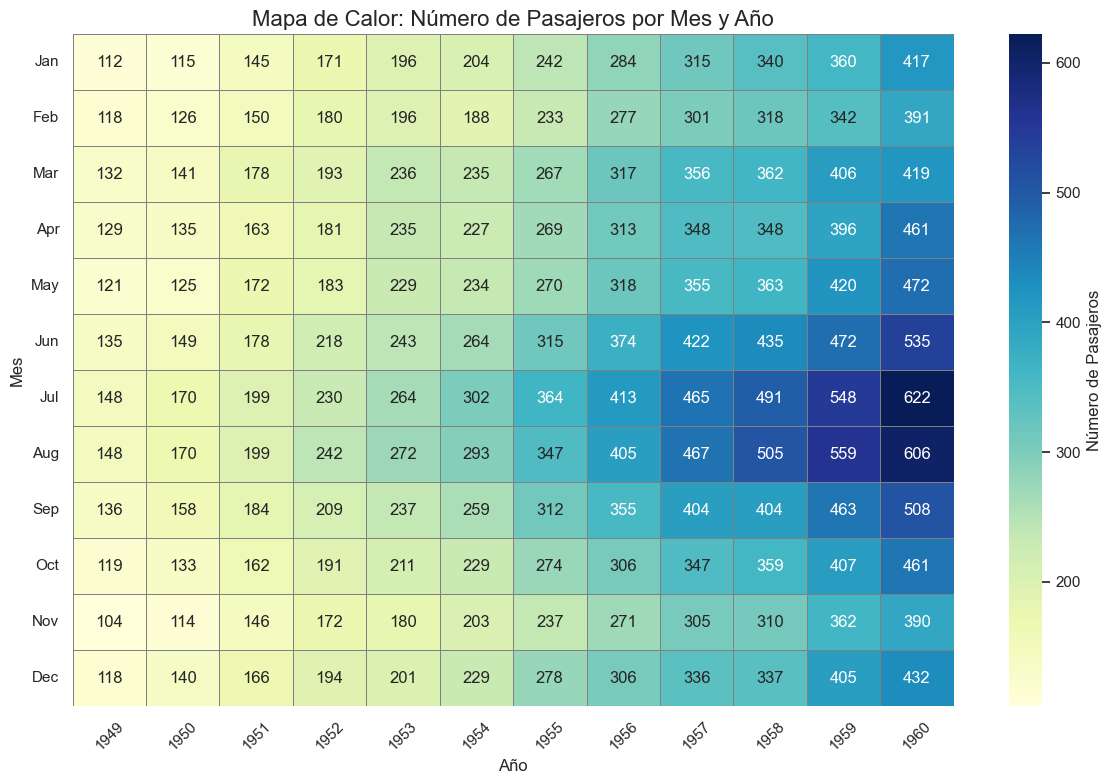

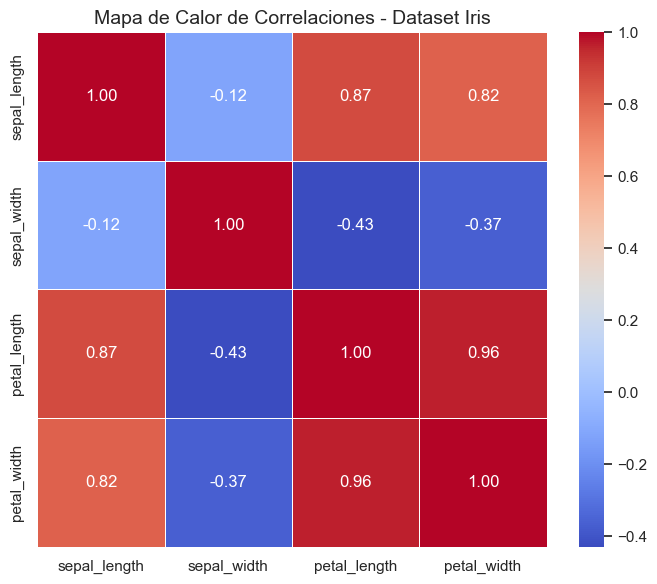

In [20]:
# --- Carga y Preparación de Datos de Ejemplo (DataFrame de Pandas) ---
# Usaremos el dataset 'flights' y lo pivotaremos para tener una estructura matricial
df_vuelos = sns.load_dataset("flights")
df_vuelos_pivot = df_vuelos.pivot(index="month", columns="year", values="passengers")
 
print("DataFrame pivotado 'flights_pivot':")
print(df_vuelos_pivot.head())
 
# --- Creación del Mapa de Calor con Seaborn ---
plt.figure(figsize=(12, 8))
heatmap_vuelos = sns.heatmap(
    df_vuelos_pivot,
    annot=True,        # Anotar los valores en las celdas
    fmt="d",           # Formato de los números anotados (entero decimal)
    cmap="YlGnBu",     # Paleta de colores (Amarillo-Verde-Azul) otros(cool, plasma, viridis)
    linewidths=.5,     # Añade líneas delgadas entre celdas
    linecolor='gray',  # Color de esas líneas
    cbar_kws={'label': 'Número de Pasajeros'} # Etiqueta para la barra de color
)
 
# --- Personalización ---
heatmap_vuelos.set_title("Mapa de Calor: Número de Pasajeros por Mes y Año", fontsize=16)
heatmap_vuelos.set_xlabel("Año", fontsize=12)
heatmap_vuelos.set_ylabel("Mes", fontsize=12)
plt.xticks(rotation=45) # Rotar etiquetas del eje X
plt.yticks(rotation=0)  # Asegurar que las etiquetas del eje Y estén horizontales
 
# --- Mostrar Gráfico ---
plt.tight_layout()
plt.show()
 
# --- Ejemplo 2: Mapa de calor de una matriz de correlación ---
df_iris = sns.load_dataset("iris")
# Seleccionar solo columnas numéricas para la correlación
columnas_numericas_iris = df_iris.select_dtypes(include=np.number)
matriz_corr_iris = columnas_numericas_iris.corr()
 
plt.figure(figsize=(7, 6))
heatmap_corr_iris = sns.heatmap(matriz_corr_iris, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
heatmap_corr_iris.set_title("Mapa de Calor de Correlaciones - Dataset Iris", fontsize=14)
plt.tight_layout()
plt.show()

## Subparcelas

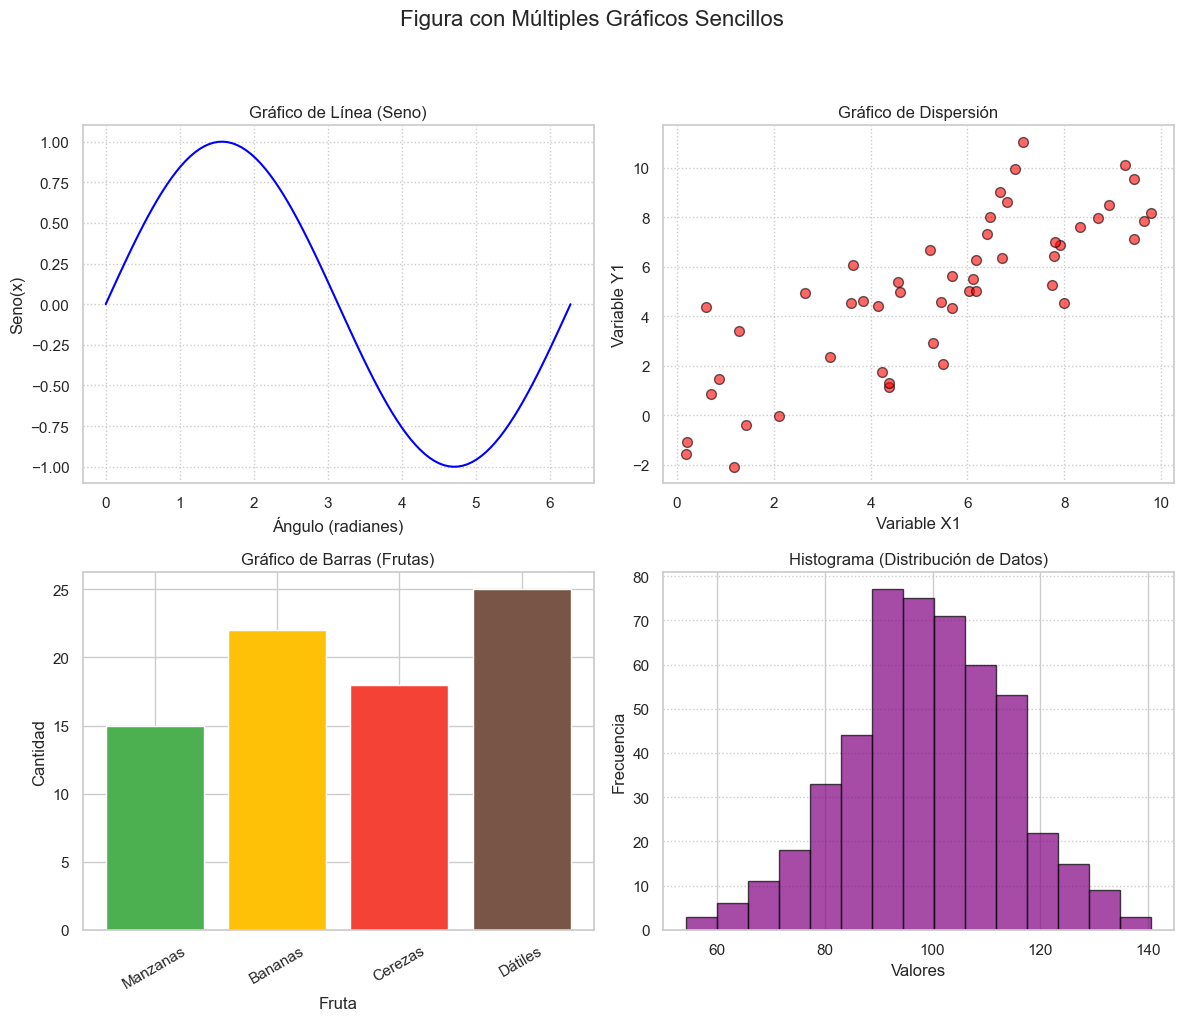

In [21]:
# --- Creación de una Figura y una Cuadrícula de Subparcelas (Axes) ---
# plt.subplots(nrows, ncols) crea una figura y una cuadrícula de subparcelas.
# Devuelve:
#   fig: el objeto Figure completo.
#   axes: un array de NumPy que contiene los objetos Axes (subparcelas).
#         Si nrows=2 y ncols=2, 'axes' será un array 2x2.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10)) # 2 filas, 2 columnas de gráficos. Tamaño de figura (ancho, alto)
 
# --- Gráfico 1: Gráfico de Línea (en axes[0, 0] - fila 0, columna 0) ---
x_linea = np.linspace(0, 2 * np.pi, 100) # 100 puntos entre 0 y 2*pi
y_linea = np.sin(x_linea)
 
axes[0, 0].plot(x_linea, y_linea, color='blue')
axes[0, 0].set_title('Gráfico de Línea (Seno)') # Título para esta subparcela
axes[0, 0].set_xlabel('Ángulo (radianes)')
axes[0, 0].set_ylabel('Seno(x)')
axes[0, 0].grid(True, linestyle=':') # Cuadrícula ligera
 
# --- Gráfico 2: Gráfico de Dispersión (en axes[0, 1] - fila 0, columna 1) ---
np.random.seed(0) # Para reproducibilidad
x_dispersion = np.random.rand(50) * 10 # 50 puntos aleatorios para X
y_dispersion = x_dispersion + np.random.randn(50) * 2 # Y con tendencia lineal + ruido
 
axes[0, 1].scatter(x_dispersion, y_dispersion, color='red', alpha=0.6, edgecolors='black', s=50) # s es el tamaño de los puntos
axes[0, 1].set_title('Gráfico de Dispersión')
axes[0, 1].set_xlabel('Variable X1')
axes[0, 1].set_ylabel('Variable Y1')
axes[0, 1].grid(True, linestyle=':')
 
# --- Gráfico 3: Gráfico de Barras (en axes[1, 0] - fila 1, columna 0) ---
categorias = ['Manzanas', 'Bananas', 'Cerezas', 'Dátiles']
cantidades = np.array([15, 22, 18, 25])
 
axes[1, 0].bar(categorias, cantidades, color=['#4CAF50', '#FFC107', '#F44336', '#795548']) # Colores diferentes por barra
axes[1, 0].set_title('Gráfico de Barras (Frutas)')
axes[1, 0].set_xlabel('Fruta')
axes[1, 0].set_ylabel('Cantidad')
axes[1, 0].tick_params(axis='x', rotation=30) # Rotar etiquetas del eje X para mejor visualización
 
# --- Gráfico 4: Histograma (en axes[1, 1] - fila 1, columna 1) ---
datos_histograma = np.random.normal(loc=100, scale=15, size=500) # Datos simulados de una distribución normal
 
axes[1, 1].hist(datos_histograma, bins=15, color='purple', alpha=0.7, edgecolor='black') # bins es el número de contenedores
axes[1, 1].set_title('Histograma (Distribución de Datos)')
axes[1, 1].set_xlabel('Valores')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].grid(True, axis='y', linestyle=':') # Cuadrícula solo en el eje Y
 
# --- Ajustes Finales y Mostrar la Figura Completa ---
# Añadir un título general a toda la figura (opcional)
fig.suptitle("Figura con Múltiples Gráficos Sencillos", fontsize=16, y=1.02) # y > 1 para que no se solape con títulos de subparcelas
 
# Ajustar el espaciado entre subparcelas para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.98]) # rect ajusta el área para dejar espacio al suptitle
 
# --- Mostrar Gráfico ---
plt.show()

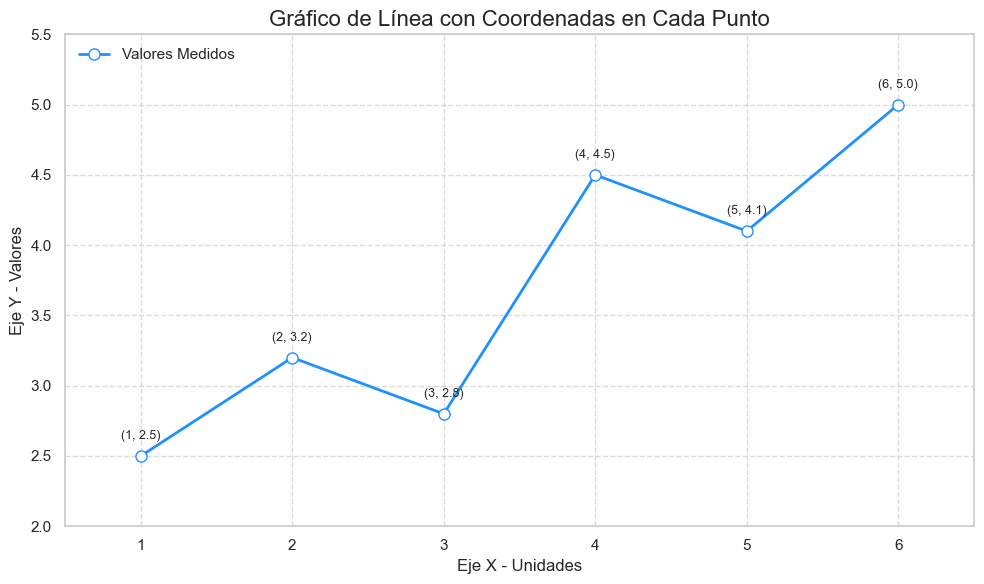

In [24]:
# --- Datos de Ejemplo ---
# Usaremos unos pocos puntos para que las etiquetas no se saturen demasiado
puntos_x = np.array([1, 2, 3, 4, 5, 6])
puntos_y = np.array([2.5, 3.2, 2.8, 4.5, 4.1, 5.0])
 
# --- Creación del Gráfico con API Orientada a Objetos ---
fig, ax = plt.subplots(figsize=(10, 6)) # Crea figura y un conjunto de ejes (subplot)
 
# --- Graficar la línea ---
ax.plot(puntos_x, puntos_y,
        color='dodgerblue',      # Color de la línea
        linestyle='-',           # Estilo de la línea
        linewidth=2,             # Grosor de la línea
        marker='o',              # Marcador en cada punto de dato
        markersize=8,            # Tamaño del marcador
        markerfacecolor='white', # Color de relleno del marcador
        markeredgecolor='dodgerblue', # Color del borde del marcador
        label='Valores Medidos') # Etiqueta para la leyenda
 
# --- Añadir las etiquetas de coordenadas (par ordenado) en cada punto ---
for i in range(len(puntos_x)):
    texto_coordenada = f'({puntos_x[i]}, {puntos_y[i]})' # Formatea el texto como (x, y)
    ax.text(
        x=puntos_x[i],                      # Posición X del texto
        y=puntos_y[i] + 0.1,                # Posición Y del texto (un pequeño desfase vertical para que no se solape con el punto)
        s=texto_coordenada,                 # El texto a mostrar
        fontsize=9,                         # Tamaño de la fuente del texto
        ha='center',                        # Alineación horizontal (center, left, right)
        va='bottom'                         # Alineación vertical (bottom, top, center)
    )
 
# --- Personalización del Gráfico ---
ax.set_title("Gráfico de Línea con Coordenadas en Cada Punto", fontsize=16)
ax.set_xlabel("Eje X - Unidades", fontsize=12)
ax.set_ylabel("Eje Y - Valores", fontsize=12)
ax.legend(loc='upper left') # Muestra la leyenda
ax.grid(True, linestyle='--', alpha=0.7) # Cuadrícula personalizada
 
# Ajustar límites si es necesario para que las etiquetas no se corten (opcional)
ax.set_ylim(np.min(puntos_y) - 0.5, np.max(puntos_y) + 0.5)
ax.set_xlim(np.min(puntos_x) - 0.5, np.max(puntos_x) + 0.5)
 
# --- Mostrar Gráfico ---
plt.tight_layout()
plt.show()
 

 

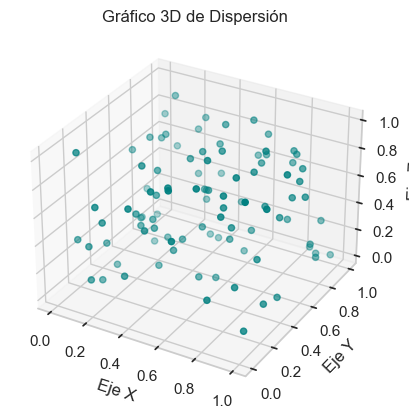

In [25]:
# Datos de ejemplo
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)
 
# Crear figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
# Gráfico de dispersión 3D
ax.scatter(x, y, z, color='teal', marker='o')
 
# Etiquetas
ax.set_title("Gráfico 3D de Dispersión")
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")
ax.set_zlabel("Eje Z")
 
plt.show()